---
## Cairo University Faculty of Engineering
## Systems and Biomedical Engineering Department
## Machine Learning Final Project
---
# Mental Disorder Classification
---

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

##Exploratory Data Analysis (EDA)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Youssef-Ashraf71/Public-Datasets/main/Dataset-Mental-Disorders.csv")
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [ ]:
df = df.drop("Patient Number",axis=1)
df = df.rename(columns={'Optimisim': 'Optimism','Anorxia': 'Anorexia'})

In [ ]:
for col in df.columns:
   count = df[col].nunique()
   values = df[col].unique()
   print(f"Number of Unique Values in {col}: {count}")
   print(f"Unique Values in {col}")
   for val in values:
      print(val)
   print("\n")


Number of Unique Values in Sadness: 4
Unique Values in Sadness
Usually
Sometimes
Seldom
Most-Often


Number of Unique Values in Euphoric: 4
Unique Values in Euphoric
Seldom
Most-Often
Usually
Sometimes


Number of Unique Values in Exhausted: 4
Unique Values in Exhausted
Sometimes
Usually
Seldom
Most-Often


Number of Unique Values in Sleep dissorder: 4
Unique Values in Sleep dissorder
Sometimes
Most-Often
Usually
Seldom


Number of Unique Values in Mood Swing: 2
Unique Values in Mood Swing
YES
NO


Number of Unique Values in Suicidal thoughts: 3
Unique Values in Suicidal thoughts
YES 
YES
NO


Number of Unique Values in Anorexia: 2
Unique Values in Anorexia
NO
YES


Number of Unique Values in Authority Respect: 2
Unique Values in Authority Respect
NO
YES


Number of Unique Values in Try-Explanation: 2
Unique Values in Try-Explanation
YES
NO


Number of Unique Values in Aggressive Response: 2
Unique Values in Aggressive Response
NO
YES


Number of Unique Values in Ignore & Move-On: 2
Un

In [ ]:
df["Suicidal thoughts"].value_counts()

Suicidal thoughts
NO      63
YES     56
YES      1
Name: count, dtype: int64

In [ ]:
df["Suicidal thoughts"] = df["Suicidal thoughts"].replace("YES ","YES")

In [ ]:
df["Suicidal thoughts"].value_counts()

Suicidal thoughts
NO     63
YES    57
Name: count, dtype: int64

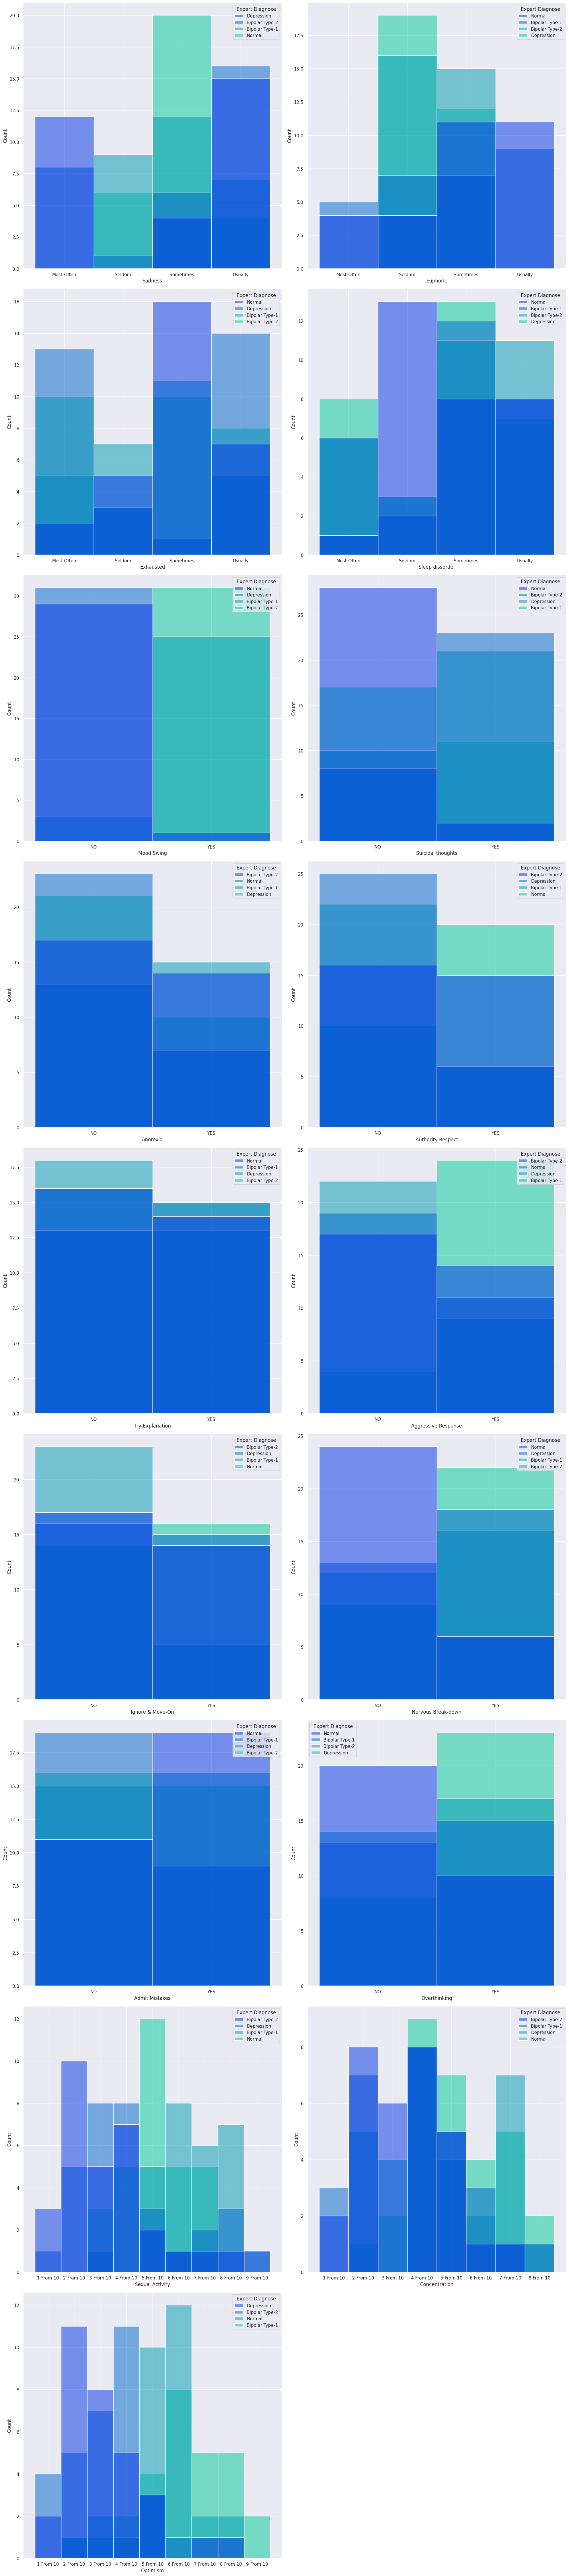

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme()

palette = "winter"

i = 0
plt.figure(figsize=(20, 90))
for col in df.drop(columns='Expert Diagnose').columns:
    i += 1
    plt.subplot(9, 2, i)
    sns.histplot(
        x=col,
        hue='Expert Diagnose',
        data=df.sort_values(by=col),
        palette=palette
    )
plt.tight_layout()
plt.show()

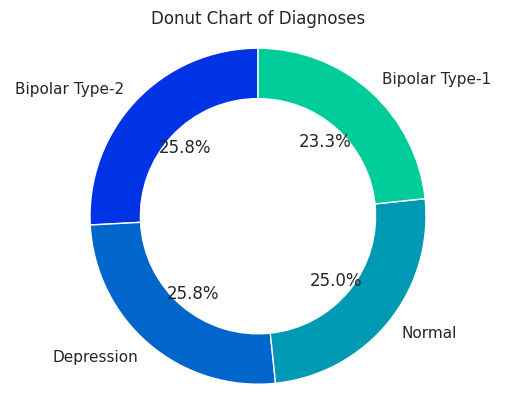

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

labels = df['Expert Diagnose'].value_counts().index
values = df['Expert Diagnose'].value_counts().values

palette = sns.color_palette("winter", len(labels))

fig, ax = plt.subplots()

ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90,colors=palette, wedgeprops=dict(width=0.3))

ax.axis('equal')
fig.patch.set_facecolor('white')
plt.title('Donut Chart of Diagnoses')

plt.show()

## Data Transformation

### One Hot Encoding

In [ ]:
normal_df = df.copy()
one_hot_df = df.copy()

In [ ]:
normal_df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [ ]:
one_hot_df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [ ]:
X_oh=one_hot_df.drop('Expert Diagnose',axis=1)
X_oh = pd.get_dummies(X_oh)
X_oh = X_oh.astype(bool).astype(int)
y_oh = one_hot_df['Expert Diagnose']
concatenated_df = pd.concat([X_oh, y_oh], axis=1)

concatenated_df.head()


,Sadness_Most-Often,Sadness_Seldom,Sadness_Sometimes,Sadness_Usually,Euphoric_Most-Often,Euphoric_Seldom,Euphoric_Sometimes,Euphoric_Usually,Exhausted_Most-Often,Exhausted_Seldom,...,Optimism_1 From 10,Optimism_2 From 10,Optimism_3 From 10,Optimism_4 From 10,Optimism_5 From 10,Optimism_6 From 10,Optimism_7 From 10,Optimism_8 From 10,Optimism_9 From 10,Expert Diagnose
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Bipolar Type-2
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Depression
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Bipolar Type-1
3,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Bipolar Type-2
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,Normal


In [ ]:
one_hot_df = concatenated_df

----------
----------------

### Multiclass Encoding

In [ ]:
normal_df['Expert Diagnose'] = normal_df['Expert Diagnose'].map({'Normal': 0,
                                                   'Bipolar Type-1': 1,
                                                  'Bipolar Type-2': 2,
                                                  'Depression': 3}).astype(int)

In [ ]:
normal_df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,0


In [ ]:
yes_no_cols = ['Mood Swing', 'Suicidal thoughts', 'Anorexia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']

In [ ]:
for col in yes_no_cols:
    normal_df[col] = normal_df[col].map({'YES': 1, 'NO': 0}).astype(int)

In [ ]:
normal_df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,0


In [ ]:
freq_cols = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']

In [ ]:
for col in freq_cols:
  normal_df[col] = normal_df[col].map({'Seldom': 0, 'Sometimes': 1, 'Usually': 2, 'Most-Often': 3}).astype(int)

In [ ]:
normal_df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,3
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,0


In [ ]:
from_cols = ['Sexual Activity', 'Concentration', 'Optimism']

In [ ]:
for col in from_cols:
  normal_df[col] = normal_df[col].astype(str).str.extract('(\d)')
  normal_df[col] = pd.to_numeric(normal_df[col])

In [ ]:
normal_df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,0


In [ ]:
normal_df.isnull().sum()

Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorexia               0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimism               0
Expert Diagnose        0
dtype: int64

In [ ]:
normal_df.describe()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.550000,0.933333,1.633333,1.458333,0.475000,0.475000,0.383333,0.391667,0.475000,0.483333,0.416667,0.516667,0.491667,0.541667,4.741667,4.250000,4.466667,1.525000
std,0.924458,0.923396,1.020243,0.977871,0.501468,0.501468,0.488237,0.490169,0.501468,0.501817,0.495074,0.501817,0.502027,0.500350,2.010459,1.797524,1.991298,1.129903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,0.750000
50%,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,4.000000,4.000000,2.000000
75%,2.000000,1.000000,2.250000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,6.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,8.000000,9.000000,3.000000


----------------
------------


## Modeling with Normal Data



In [ ]:
X = normal_df.drop(columns=['Expert Diagnose'],axis=1)
y = normal_df['Expert Diagnose']

----------
-----------

### Random Forest



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=0)


k = 5

# Define the cross-validation method (in this case, k-fold)
cv = KFold(n_splits=k, shuffle=True, random_state=0)
# define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state = 0)

# instantiate GridSearchCV
grid_search = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, verbose = 0,cv=cv)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# set the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
optimized_rf_classifier = RandomForestClassifier(**best_params, random_state = 0) # dict unpacking

# fit the new classifier on the training data
optimized_rf_classifier.fit(X_train, y_train)

# make predictions on the test and train data
y_pred_test = optimized_rf_classifier.predict(X_test)
y_pred_train = optimized_rf_classifier.predict(X_train)

# evaluate the model
# calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

# calculate accuracy on the test set
rf_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {rf_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 94.79%
Testing Accuracy: 91.67%
Classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.80      0.89         5
           2       0.89      1.00      0.94         8
           3       1.00      0.50      0.67         2

    accuracy                           0.92        24
   macro avg       0.95      0.82      0.86        24
weighted avg       0.93      0.92      0.91        24



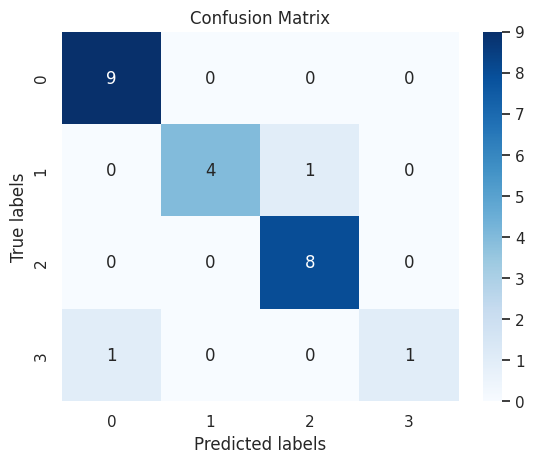

In [ ]:
# confusion matrix with heatmap from seaborn
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

-----------
--------------

### Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
# Define the number of folds for cross-validation
k = 5

# Define the cross-validation method (in this case, k-fold)
cv = KFold(n_splits=k, shuffle=True, random_state=0)

param_c = {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "logreg__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(penalty='l2'))])

gs = GridSearchCV(pipe,param_grid=param_c,refit=True,n_jobs=-1, cv=cv)
gs.fit(X_train, y_train)
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)
print("train score: ", gs.score(X_train, y_train)*100)
print("test score: ", gs.score(X_test, y_test)*100)

Best Accuracy: 84.42%
Best Params: {'logreg__C': 0.1, 'logreg__solver': 'newton-cg'}
train score:  94.79166666666666
test score:  87.5


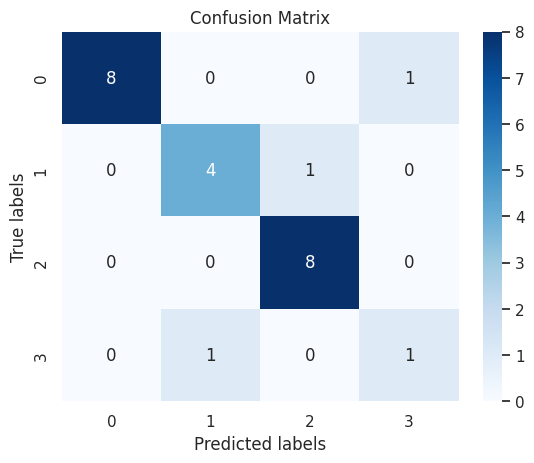

In [ ]:
# confusion matrix with heatmap from seaborn
conf_matrix = confusion_matrix(y_test, gs.predict(X_test))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



----------
------------

### SVM


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the SVM model
svm_model = SVC()

# Define the hyperparameters grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly']  # Kernel type
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print('Best Accuracy: %.2f%%' % (grid_search.best_score_*100))
print('Best Params:', grid_search.best_params_)
print("train score: ", grid_search.score(X_train, y_train)*100)
print("test score: ", grid_search.score(X_test, y_test)*100)


Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.71      1.00      0.83         5
           2       1.00      0.88      0.93         8
           3       1.00      0.50      0.67         2

    accuracy                           0.88        24
   macro avg       0.90      0.82      0.83        24
weighted avg       0.90      0.88      0.87        24

Best Accuracy: 82.26%
Best Params: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
train score:  93.75
test score:  87.5


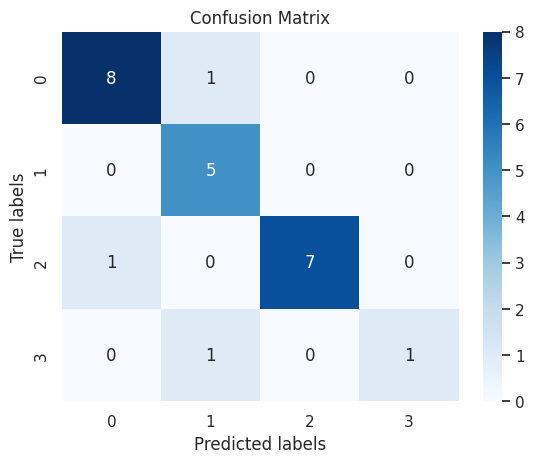

In [ ]:
# confusion matrix with heatmap from seaborn
conf_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

--------------
------------

## Modeling on One-Hot Endoded Data



In [ ]:
one_hot_df.head()

,Sadness_Most-Often,Sadness_Seldom,Sadness_Sometimes,Sadness_Usually,Euphoric_Most-Often,Euphoric_Seldom,Euphoric_Sometimes,Euphoric_Usually,Exhausted_Most-Often,Exhausted_Seldom,...,Optimism_1 From 10,Optimism_2 From 10,Optimism_3 From 10,Optimism_4 From 10,Optimism_5 From 10,Optimism_6 From 10,Optimism_7 From 10,Optimism_8 From 10,Optimism_9 From 10,Expert Diagnose
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Bipolar Type-2
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Depression
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Bipolar Type-1
3,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Bipolar Type-2
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,Normal


In [ ]:
one_hot_df['Expert Diagnose'] = one_hot_df['Expert Diagnose'].map({'Normal': 0,
                                                   'Bipolar Type-1': 1,
                                                  'Bipolar Type-2': 2,
                                                  'Depression': 3}).astype(int)

In [ ]:
one_hot_df.head()

,Sadness_Most-Often,Sadness_Seldom,Sadness_Sometimes,Sadness_Usually,Euphoric_Most-Often,Euphoric_Seldom,Euphoric_Sometimes,Euphoric_Usually,Exhausted_Most-Often,Exhausted_Seldom,...,Optimism_1 From 10,Optimism_2 From 10,Optimism_3 From 10,Optimism_4 From 10,Optimism_5 From 10,Optimism_6 From 10,Optimism_7 From 10,Optimism_8 From 10,Optimism_9 From 10,Expert Diagnose
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


----------
-----------

In [ ]:
X = one_hot_df.drop(columns=['Expert Diagnose'],axis=1)
y = one_hot_df['Expert Diagnose']

### Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=0)


k = 5

# Define the cross-validation method (in this case, k-fold)
cv = KFold(n_splits=k, shuffle=True, random_state=0)
# define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state = 0)

# instantiate GridSearchCV
grid_search = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, verbose = 0,cv=cv)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# set the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
optimized_rf_classifier = RandomForestClassifier(**best_params, random_state = 0) # dict unpacking

# fit the new classifier on the training data
optimized_rf_classifier.fit(X_train, y_train)

# make predictions on the test and train data
y_pred_test = optimized_rf_classifier.predict(X_test)
y_pred_train = optimized_rf_classifier.predict(X_train)

# evaluate the model
# calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

# calculate accuracy on the test set
rf_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {rf_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 97.92%
Testing Accuracy: 87.50%
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.80      0.80      0.80         5
           2       0.88      0.88      0.88         8
           3       0.67      1.00      0.80         2

    accuracy                           0.88        24
   macro avg       0.84      0.89      0.85        24
weighted avg       0.89      0.88      0.88        24



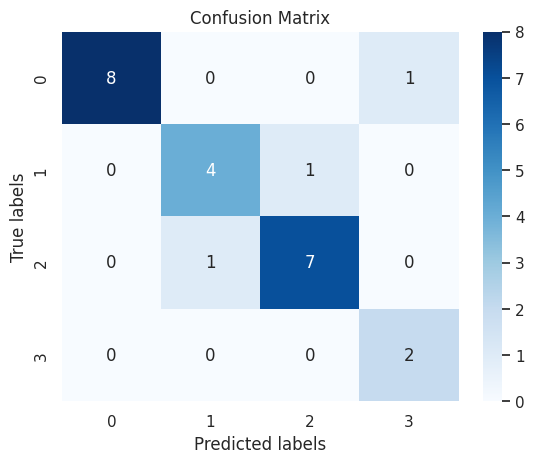

In [ ]:
# confusion matrix with heatmap from seaborn
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


-----------
-----------

### Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
# Define the number of folds for cross-validation
k = 5

# Define the cross-validation method (in this case, k-fold)
cv = KFold(n_splits=k, shuffle=True, random_state=0)

param_c = {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "logreg__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(penalty='l2'))])

gs = GridSearchCV(pipe,param_grid=param_c,refit=True,n_jobs=-1, cv=cv)
gs.fit(X_train, y_train)
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)
print("train score: ", gs.score(X_train, y_train)*100)
print("test score: ", gs.score(X_test, y_test)*100)

Best Accuracy: 85.42%
Best Params: {'logreg__C': 0.01, 'logreg__solver': 'liblinear'}
train score:  96.875
test score:  75.0


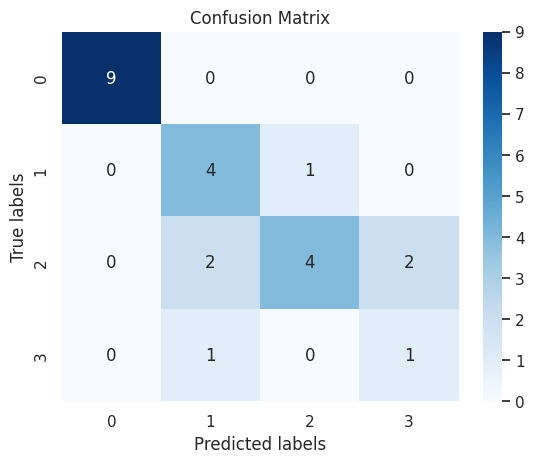

In [ ]:
# confusion matrix with heatmap from seaborn
conf_matrix = confusion_matrix(y_test, gs.predict(X_test))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


------
-----

### SVM

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the SVM model
svm_model = SVC()

# Define the hyperparameters grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly']  # Kernel type
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print('Best Accuracy: %.2f%%' % (grid_search.best_score_*100))
print('Best Params:', grid_search.best_params_)
print("train score: ", grid_search.score(X_train, y_train)*100)
print("test score: ", grid_search.score(X_test, y_test)*100)


Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.67      0.80      0.73         5
           2       0.86      0.75      0.80         8
           3       0.50      0.50      0.50         2

    accuracy                           0.83        24
   macro avg       0.76      0.76      0.76        24
weighted avg       0.84      0.83      0.83        24

Best Accuracy: 81.21%
Best Params: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
train score:  100.0
test score:  83.33333333333334


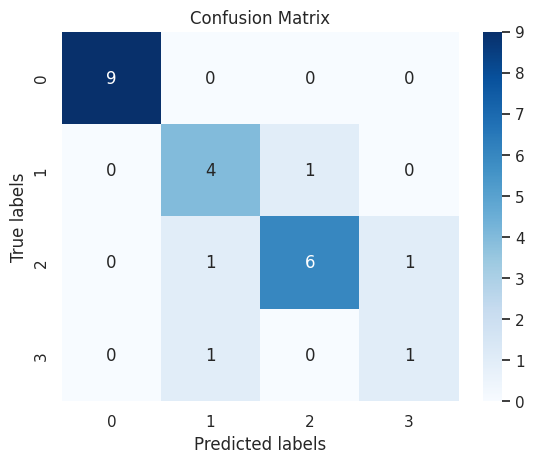

In [ ]:
# confusion matrix with heatmap from seaborn
conf_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()
